# Analyzing Advanced Metrics of Wide Receiver Play in the NFL
## Krishnan Chander

The sport of American football, especially at the professional level in the National Football League (NFL), has seen an evolution over the last century to an offensive style dominated by the passing game. Even though running plays still play a vital role in moving the ball down the field, the efficiency of quarterbacks passing the ball forward and the lower chance of injuries sustained than when running the ball has led to the passing game being the primary style of all 32 NFL offensive units. This has led to the main school of thought around building a team's offense, whether through the draft, free agency or trading, being that not only is it vital to acquire a quarterback who can sling the ball with strength and accuracy, but that there are weapons for that quarterback in the form of wide receivers, tight ends, etc. who can not only make secure catches but also run the ball down the field after the catch and hopefully get a touchdown.  

Physical measurables like size, strength and speed do help when considering which players to draft from college or sign when making either a free agency acquisition or trade. However, measurables are only part of the story; the ability of offensive coaches, whether at the head position or at an assistant level, to utilize the skillset of these players in moving the ball down the field by creating a variety of play packages that incorporate different formations and schemes that require different kinds of route running to get open and gain yards after the catch. Not only do the results of the play calls vary by team, but they actually have dependence on receiving position, as even running backs are being utilized frequently in catching passes on top of receivers and tight ends.  

The objective of this project is to answer this question: how do different receivers compare on metrics that define their offensive performance when it comes to offensive concept and defensive scheme? This analysis will be based on receiving play data from the analytics firm Pro Football Focus (PFF) from the 2022-23 NFL season (including both regular season and playoff games).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
receiving_summary = pd.read_csv('receiving_summary.csv')
receiving_depth = pd.read_csv('receiving_depth.csv')
receiving_concept = pd.read_csv('receiving_concept.csv')
receiving_scheme = pd.read_csv('receiving_scheme.csv')

In [3]:
# This is set to display all columns whenever showing a DataFrame, since these data sets have many features.

pd.set_option('display.max_columns', None)

In [4]:
receiving_summary.replace({'HB': 'RB'}, inplace=True)
receiving_depth.replace({'HB': 'RB'}, inplace=True)
receiving_concept.replace({'HB': 'RB'}, inplace=True)
receiving_scheme.replace({'HB': 'RB'}, inplace=True)

## 1. Receiving Stats by Position
First we want to analyze the baseline statistics for receiving yards per play, both across all players and by position. This establishes what the general expectation is for receivers on the average play.  

Below is a box plot showing the quartiles of yards per reception (YPR) across the league for the entire season. [Annotation source here](https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value)

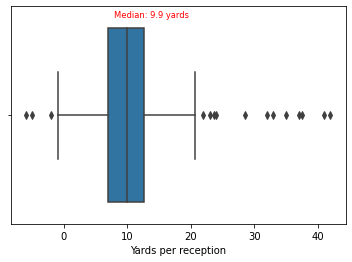

In [5]:
g = sb.boxplot(data=receiving_summary, x='yards_per_reception')
g.set_xlabel('Yards per reception')
g.text(receiving_summary['yards_per_reception'].median() - 2, -0.45,
       'Median: {} yards'.format(receiving_summary['yards_per_reception'].median()),
       size='small',color='r');

50% of the receiving players had an average YPR of at least 9.9 yards, so this gives us one statistic that establishes a baseline expectation of how many yards a player is expectated to gain on one play. Note that the outliers that are points outside the whiskers of the plot are either negative or very large. These are largely data points for players who may have had very few catches at all but either did poorly and lost yards or made a huge gain down the field.  

Now let's look at a histogram showing the distribution of YPR for all players.

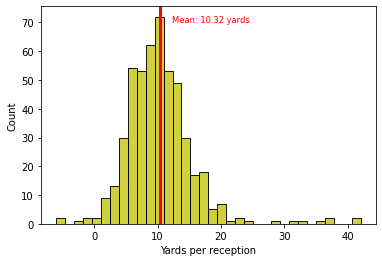

In [6]:
g = sb.histplot(data=receiving_summary, x='yards_per_reception', color='y')
g.set_xlabel('Yards per reception')
g.axvline(x=receiving_summary['yards_per_reception'].mean(), color='red', lw=3)
g.text(receiving_summary['yards_per_reception'].mean() + 2, 70,
       'Mean: {:.2f} yards'.format(receiving_summary['yards_per_reception'].mean()),
       size='small',color='r');

The mean YPR is 10.3 yards, which is slightly above the median. Both statistics give us an idea of what the expected yards per play should be for the average receiver. However, how do different positions compare, and furthermore do all positions matter when going forward with our analysis? We can answer that by plotting a box plot of YPR grouped by position.

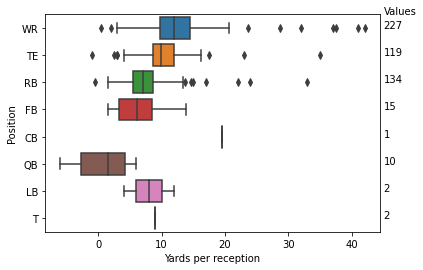

In [7]:
g = sb.boxplot(data=receiving_summary, x='yards_per_reception', y='position')
g.set_xlabel('Yards per reception')
g.set_ylabel('Position')
g.text(45, -0.5, 'Values')
for ytick in g.get_yticks():
    pos = g.get_yticklabels()[ytick].get_text()
    g.text(45, ytick, len(receiving_summary[receiving_summary['position'] == pos]))

The wide receiver (WR), tight end (TE) and running back (RB) positions all have more than 100 players listed in the summary statistics data. Other positions do not have nearly as many players with receiving stats, so we can clean up the summary table by including only the three aforementioned positions.

In [8]:
receiving_summary = receiving_summary[receiving_summary['position'].isin(['WR', 'TE', 'RB'])]
receiving_summary['position'].value_counts()

WR    227
RB    134
TE    119
Name: position, dtype: int64

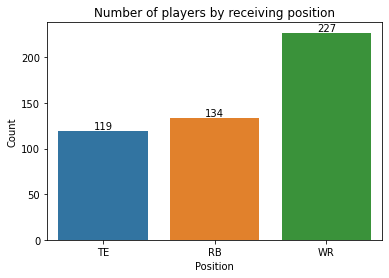

In [9]:
position_counts = receiving_summary.groupby('position', as_index=False).count()
position_counts.rename(columns={'player': 'count'}, inplace=True)
position_counts.sort_values(by='count', inplace=True)

g = sb.barplot(data=position_counts, x='position', y='count')
g.set_xlabel('Position')
g.set_ylabel('Count')
g.text(0, position_counts[position_counts['position']==g.get_xticklabels()[0].get_text()]['count'] + 2,
       position_counts[position_counts['position']==g.get_xticklabels()[0].get_text()]['count'].values[0],
       horizontalalignment='center')
g.text(1, position_counts[position_counts['position']==g.get_xticklabels()[1].get_text()]['count'] + 2,
       position_counts[position_counts['position']==g.get_xticklabels()[1].get_text()]['count'].values[0],
       horizontalalignment='center')
g.text(2, position_counts[position_counts['position']==g.get_xticklabels()[2].get_text()]['count'] + 2,
       position_counts[position_counts['position']==g.get_xticklabels()[2].get_text()]['count'].values[0],
       horizontalalignment='center')
g.set_title('Number of players by receiving position');

Now we can take a look at YPR distribution by position.

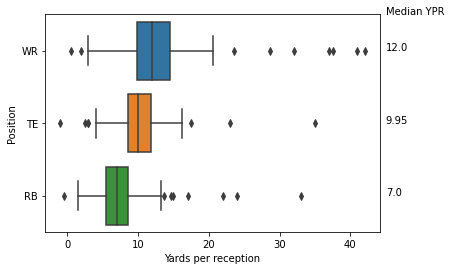

In [10]:
g = sb.boxplot(data=receiving_summary, x='yards_per_reception', y='position')
g.set_xlabel('Yards per reception')
g.set_ylabel('Position')
g.text(45, -0.5, 'Median YPR')
for ytick in g.get_yticks():
    pos = g.get_yticklabels()[ytick].get_text()
    g.text(45, ytick,
           receiving_summary[receiving_summary['position'] == pos]['yards_per_reception'].median())

The median YPR statistics show a clear pattern by high-volume positions. Wide receivers have a median YPR of 12 yards, tight ends 9.95 yards, and running backs 7 yards. This shows that wide receivers can be trusted to get more yards overall than anyone else on a passing play, but tight ends can get enough yards as well and more than running backs.  

With that said, YPR accounts for both the depth of the catch and the receiver's yards after the catch per reception (YACPR). What is the distribution of that metric across the league (only for the three positions of interest), and how does that compare between positions?

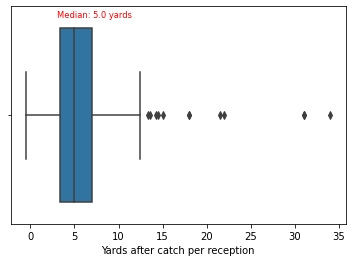

In [11]:
g = sb.boxplot(data=receiving_summary, x='yards_after_catch_per_reception')
g.set_xlabel('Yards after catch per reception')
g.text(receiving_summary['yards_after_catch_per_reception'].median() - 2, -0.45,
       'Median: {} yards'.format(receiving_summary['yards_after_catch_per_reception'].median()),
       size='small',color='r');

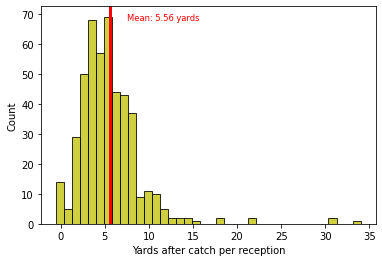

In [12]:
g = sb.histplot(data=receiving_summary, x='yards_after_catch_per_reception', color='y')
g.set_xlabel('Yards after catch per reception')
g.axvline(x=receiving_summary['yards_after_catch_per_reception'].mean(), color='red', lw=3)
g.text(receiving_summary['yards_after_catch_per_reception'].mean() + 2, 68,
       'Mean: {:.2f} yards'.format(receiving_summary['yards_after_catch_per_reception'].mean()),
       size='small',color='r');

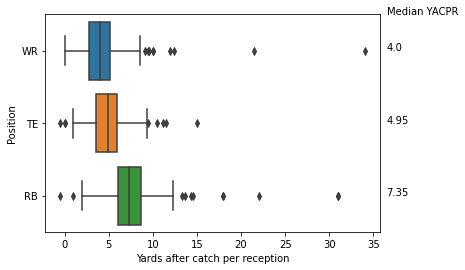

In [13]:
g = sb.boxplot(data=receiving_summary, x='yards_after_catch_per_reception', y='position')
g.set_xlabel('Yards after catch per reception')
g.set_ylabel('Position')
g.text(36.5, -0.5, 'Median YACPR')
for ytick in g.get_yticks():
    pos = g.get_yticklabels()[ytick].get_text()
    g.text(36.5, ytick,
           receiving_summary[receiving_summary['position'] == pos]['yards_after_catch_per_reception'].median())

This time, YACPR overall trends in the opposite direction as YPR by position. Why is that? By definition, a wide receiver goes out deeper into the field with greater speed and expands the quarterback's range of passing into defensive coverages, which means they don't have to run much farther after the catch when they can get deeper to catch the ball. Tight ends are larger and not as fast, so they are generally relied on to catch shorter passes over the middle and then run further. Running backs, on the other hand, tend to catch passes at the line of scrimmage earlier after the snap, so they are more likely to run further after the catch.  

To better illustrate the discrepancy across these positions in terms of what YAC contributes to their playmaking, we create a new feature for the ratio of YAC to total yards per reception.

In [14]:
receiving_summary['yacpr_to_ypr_ratio'] = receiving_summary['yards_after_catch_per_reception'] / receiving_summary['yards_per_reception']

In [15]:
receiving_summary = receiving_summary[(receiving_summary['yacpr_to_ypr_ratio'] > 0)
                                      & (receiving_summary['yacpr_to_ypr_ratio'] <= 2)]
receiving_summary.describe()

,player_id,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,declined_penalties,drop_rate,drops,first_downs,franchise_id,fumbles,grades_hands_drop,grades_hands_fumble,grades_offense,grades_pass_block,grades_pass_route,inline_rate,inline_snaps,interceptions,longest,pass_block_rate,pass_blocks,pass_plays,penalties,receptions,route_rate,routes,slot_rate,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr,yacpr_to_ypr_ratio
count,444.000000,444.000000,444.000000,444.000000,444.000000,342.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,294.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,43166.051802,12.362613,6.975225,3.502252,71.680180,45.578655,2.855856,6.211712,0.126126,6.317117,1.725225,14.333333,16.421171,0.308559,66.604054,65.249099,65.139189,58.260204,63.521171,13.957658,31.236486,0.970721,32.049550,8.384910,15.608108,248.092342,1.087838,27.141892,86.905856,220.137387,27.697748,76.878378,92.597297,38.774775,1.768018,32.913514,95.054054,298.236486,141.182432,5.720270,10.811036,1.278356,0.608812
std,28588.181146,5.190854,5.955984,4.800536,15.858165,30.042928,4.154134,8.299161,0.364747,8.499655,1.948825,16.767475,9.320024,0.598583,14.837410,19.414783,10.600485,17.415912,11.307542,25.244920,67.235111,1.474095,17.950704,10.678859,22.980402,201.278438,1.471762,27.673526,10.346361,187.610594,22.740269,97.967510,25.261849,39.424113,2.451841,30.317665,137.680812,341.134497,149.795076,3.589506,4.921312,0.808254,0.379047
min,2973.000000,1.000000,-7.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.500000,13.300000,32.200000,11.200000,30.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,30.000000,1.000000,0.000000,0.000000,5.100000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.800000,2.000000,0.150000,0.069565
25%,11915.250000,9.000000,1.700000,0.000000,63.175000,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,9.000000,0.000000,59.175000,58.750000,57.500000,46.325000,55.075000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,78.000000,0.000000,6.000000,80.475000,69.000000,9.000000,10.000000,78.475000,9.000000,0.000000,7.000000,9.750000,57.000000,31.000000,3.500000,7.675000,0.800000,0.321477
50%,45740.500000,13.500000,7.050000,2.000000,71.500000,44.950000,1.000000,3.000000,0.000000,4.500000,1.000000,8.000000,16.000000,0.000000,68.600000,71.500000,64.550000,62.400000,62.800000,0.200000,1.000000,0.000000,29.000000,2.600000,3.000000,191.000000,1.000000,17.000000,91.200000,163.500000,22.500000,33.000000,94.300000,23.000000,1.000000,18.300000,32.500000,162.000000,95.500000,5.100000,10.200000,1.130000,0.478835
75%,60994.250000,17.000000,11.200000,5.000000,81.800000,60.000000,4.000000,8.000000,0.000000,8.600000,3.000000,20.000000,25.000000,0.000000,77.300000,78.300000,72.125000,71.975000,69.900000,13.700000,15.250000,1.000000,44.000000,15.300000,24.250000,377.250000,1.250000,40.000000,94.525000,338.250000,41.625000,111.000000,108.525000,56.000000,3.000000,65.100000,113.500000,420.250000,199.250000,7.025000,12.900000,1.580000,0.909416
max,143786.000000,20.000000,28.300000,36.000000,100.000000,100.000000,24.000000,47.000000,2.000000,66.700000,9.000000,92.000000,32.000000,3.000000,91.000000,91.300000,92.100000,89.600000,92.400000,94.900000,358.000000,7.000000,98.000000,65.000000,140.000000,777.000000,8.000000,137.000000,100.000000,729.000000,100.000000,586.000000,158.300000,185.000000,16.000000,100.000000,630.000000,1857.000000,871.

In [16]:
receiving_summary['ypr_to_yacpr_ratio'] = 1 / receiving_summary['yacpr_to_ypr_ratio']
receiving_summary.describe()

,player_id,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,declined_penalties,drop_rate,drops,first_downs,franchise_id,fumbles,grades_hands_drop,grades_hands_fumble,grades_offense,grades_pass_block,grades_pass_route,inline_rate,inline_snaps,interceptions,longest,pass_block_rate,pass_blocks,pass_plays,penalties,receptions,route_rate,routes,slot_rate,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr,yacpr_to_ypr_ratio,ypr_to_yacpr_ratio
count,444.000000,444.000000,444.000000,444.000000,444.000000,342.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,294.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,43166.051802,12.362613,6.975225,3.502252,71.680180,45.578655,2.855856,6.211712,0.126126,6.317117,1.725225,14.333333,16.421171,0.308559,66.604054,65.249099,65.139189,58.260204,63.521171,13.957658,31.236486,0.970721,32.049550,8.384910,15.608108,248.092342,1.087838,27.141892,86.905856,220.137387,27.697748,76.878378,92.597297,38.774775,1.768018,32.913514,95.054054,298.236486,141.182432,5.720270,10.811036,1.278356,0.608812,2.447913
std,28588.181146,5.190854,5.955984,4.800536,15.858165,30.042928,4.154134,8.299161,0.364747,8.499655,1.948825,16.767475,9.320024,0.598583,14.837410,19.414783,10.600485,17.415912,11.307542,25.244920,67.235111,1.474095,17.950704,10.678859,22.980402,201.278438,1.471762,27.673526,10.346361,187.610594,22.740269,97.967510,25.261849,39.424113,2.451841,30.317665,137.680812,341.134497,149.795076,3.589506,4.921312,0.808254,0.379047,1.709579
min,2973.000000,1.000000,-7.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.500000,13.300000,32.200000,11.200000,30.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,30.000000,1.000000,0.000000,0.000000,5.100000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.800000,2.000000,0.150000,0.069565,0.500000
25%,11915.250000,9.000000,1.700000,0.000000,63.175000,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,9.000000,0.000000,59.175000,58.750000,57.500000,46.325000,55.075000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,78.000000,0.000000,6.000000,80.475000,69.000000,9.000000,10.000000,78.475000,9.000000,0.000000,7.000000,9.750000,57.000000,31.000000,3.500000,7.675000,0.800000,0.321477,1.099616
50%,45740.500000,13.500000,7.050000,2.000000,71.500000,44.950000,1.000000,3.000000,0.000000,4.500000,1.000000,8.000000,16.000000,0.000000,68.600000,71.500000,64.550000,62.400000,62.800000,0.200000,1.000000,0.000000,29.000000,2.600000,3.000000,191.000000,1.000000,17.000000,91.200000,163.500000,22.500000,33.000000,94.300000,23.000000,1.000000,18.300000,32.500000,162.000000,95.500000,5.100000,10.200000,1.130000,0.478835,2.088400
75%,60994.250000,17.000000,11.200000,5.000000,81.800000,60.000000,4.000000,8.000000,0.000000,8.600000,3.000000,20.000000,25.000000,0.000000,77.300000,78.300000,72.125000,71.975000,69.900000,13.700000,15.250000,1.000000,44.000000,15.300000,24.250000,377.250000,1.250000,40.000000,94.525000,338.250000,41.625000,111.000000,108.525000,56.000000,3.000000,65.100000,113.500000,420.250000,199.250000,7.025000,12.900000,1.580000,0.909416,3.110707
max,143786.000000,20.000000,28.300000,36.000000,100.000000,100.000000,24.000000,47.000000,2.000000,66.700000,9.000000,92.000000,32.000000,3.000000,91.000000,91.300000,92.100000,89.600000,92.400000,94.900000,358.000000,7.000000,98.000000,65.000000,140.000000,777.000000,8.000000,137.000000,100.000000,729.000000,100.0000

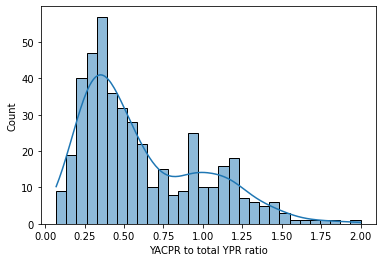

In [17]:
g = sb.histplot(data=receiving_summary, x='yacpr_to_ypr_ratio', bins=30, kde=True)
g.set_xlabel('YACPR to total YPR ratio');

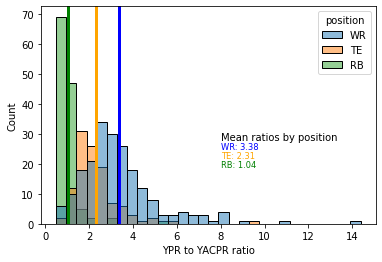

In [18]:
g = sb.histplot(data=receiving_summary, x='ypr_to_yacpr_ratio', bins=30, hue='position')
g.set_xlabel('YPR to YACPR ratio')
g.axvline(x=receiving_summary[receiving_summary['position'] == 'WR']['ypr_to_yacpr_ratio'].mean(), color='blue', lw=3)
g.axvline(x=receiving_summary[receiving_summary['position'] == 'TE']['ypr_to_yacpr_ratio'].mean(), color='orange', lw=3)
g.axvline(x=receiving_summary[receiving_summary['position'] == 'RB']['ypr_to_yacpr_ratio'].mean(), color='green', lw=3)
g.text(8, 28, 'Mean ratios by position')
g.text(8, 25, 'WR: {:.2f}'.format(receiving_summary[receiving_summary['position'] == 'WR']['ypr_to_yacpr_ratio'].mean()),
       size='small',color='blue');
g.text(8, 22, 'TE: {:.2f}'.format(receiving_summary[receiving_summary['position'] == 'TE']['ypr_to_yacpr_ratio'].mean()),
       size='small',color='orange');
g.text(8, 19, 'RB: {:.2f}'.format(receiving_summary[receiving_summary['position'] == 'RB']['ypr_to_yacpr_ratio'].mean()),
       size='small',color='green');

Given that a lot of the outlier values for YPA and YAC per reception are resulting in wide-ranging outlier values for the ratio, let's look at the distribution of ratios that fall between 0 and 2.

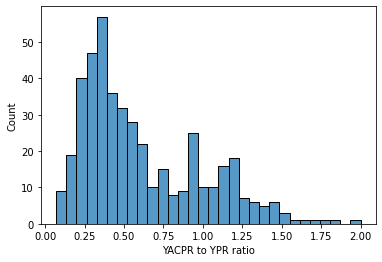

In [19]:
g = sb.histplot(data=receiving_summary[(receiving_summary['yacpr_to_ypr_ratio'] > 0)
                                       & (receiving_summary['yacpr_to_ypr_ratio'] <= 2)],
                  x='yacpr_to_ypr_ratio', bins=30)
g.set_xlabel('YACPR to YPR ratio');

This appears to show a multimodal distribution. What does it look like if we break it down by position?

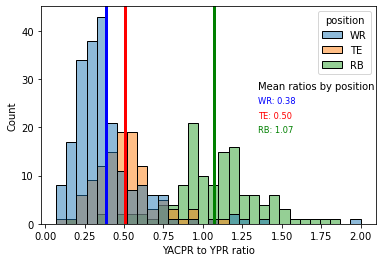

In [20]:
g = sb.histplot(data=receiving_summary[(receiving_summary['yacpr_to_ypr_ratio'] > 0)
                                       & (receiving_summary['yacpr_to_ypr_ratio'] <= 2)],
                  x='yacpr_to_ypr_ratio', hue='position', bins=30)
g.set_xlabel('YACPR to YPR ratio')
g.axvline(x=receiving_summary[receiving_summary['position'] == 'WR']['yacpr_to_ypr_ratio'].mean(), color='blue', lw=3)
g.axvline(x=receiving_summary[receiving_summary['position'] == 'TE']['yacpr_to_ypr_ratio'].mean(), color='red', lw=3)
g.axvline(x=receiving_summary[receiving_summary['position'] == 'RB']['yacpr_to_ypr_ratio'].mean(), color='green', lw=3)
g.text(1.35, 28, 'Mean ratios by position')
g.text(1.35, 25, 'WR: {:.2f}'.format(receiving_summary[receiving_summary['position'] == 'WR']['yacpr_to_ypr_ratio'].mean()),
       size='small',color='blue');
g.text(1.35, 22, 'TE: {:.2f}'.format(receiving_summary[receiving_summary['position'] == 'TE']['yacpr_to_ypr_ratio'].mean()),
       size='small',color='red');
g.text(1.35, 19, 'RB: {:.2f}'.format(receiving_summary[receiving_summary['position'] == 'RB']['yacpr_to_ypr_ratio'].mean()),
       size='small',color='green');

From this histogram breakdown by position, we can tell that tight ends have a slightly higher average ratio of YAC per reception to total YPA than wide receivers, and running backs have by far the highest average ratio at ~1, which essentially means that on average all their yards per reception come from after the catch.  

Now the question is, what does this mean for how the trend between YAC per reception and YPA compares between positions?

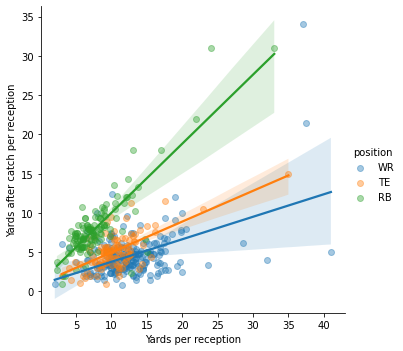

In [21]:
g = sb.lmplot(data=receiving_summary, x='yards_per_reception', y='yards_after_catch_per_reception', hue='position',
              scatter_kws={'alpha': 0.4})
g.set_axis_labels('Yards per reception', 'Yards after catch per reception');

The increase in slope from WR to TE to RB is consistent with the trend in average ratios between YAC per reception and YPA. What does this tell us? It shows that while receivers and tight ends have a broader range of YPA than running backs, and are generally expected to get more YPA on average, running backs can be trusted more than the other two positions to convert more shallow passes into big gains after the catch. This will help inform offensive playcalling and determine how these positions can be used depending on how many yards need to be gained and how the defense could affect the depth of the pass.  

## 2. Receiving Concept
Now in terms of play-calling, how does YAC-to-YPA ratio compare to YPA and average depth of target (ADOT) in different offensive concepts, namely **screen** passes behind the offensive line vs. catching up the middle from the **slot**?

In [22]:
receiving_concept = pd.merge(receiving_summary[['player', 'player_id', 'position', 'team_name', 'yacpr_to_ypr_ratio']],
                             receiving_concept.drop(columns=['player', 'position', 'team_name']), on='player_id')
receiving_concept

,player,player_id,position,team_name,yacpr_to_ypr_ratio,player_game_count,base_targets,declined_penalties,franchise_id,penalties,screen_avg_depth_of_target,screen_avoided_tackles,screen_caught_percent,screen_contested_catch_rate,screen_contested_receptions,screen_contested_targets,screen_drop_rate,screen_drops,screen_first_downs,screen_fumbles,screen_grades_hands_drop,screen_grades_pass_route,screen_interceptions,screen_longest,screen_pass_block_rate,screen_pass_blocks,screen_pass_plays,screen_receptions,screen_route_rate,screen_routes,screen_targeted_qb_rating,screen_targets,screen_targets_percent,screen_touchdowns,screen_yards,screen_yards_after_catch,screen_yards_after_catch_per_reception,screen_yards_per_reception,screen_yprr,slot_avg_depth_of_target,slot_avoided_tackles,slot_caught_percent,slot_contested_catch_rate,slot_contested_receptions,slot_contested_targets,slot_drop_rate,slot_drops,slot_first_downs,slot_fumbles,slot_grades_hands_drop,slot_grades_pass_route,slot_interceptions,slot_longest,slot_pass_block_rate,slot_pass_blocks,slot_pass_plays,slot_receptions,slot_route_rate,slot_routes,slot_targeted_qb_rating,slot_targets,slot_targets_percent,slot_touchdowns,slot_yards,slot_yards_after_catch,slot_yards_after_catch_per_reception,slot_yards_per_reception,slot_yprr
0,Justin Jefferson,61398,WR,MIN,0.340580,18,185,0,18,0,-1.4,0,100.0,NaN,0,0,0.0,0,4,0,92.4,72.5,0,17,0.0,0,77,14,93.5,72,90.8,14,7.6,0,81,101,7.2,5.8,1.13,10.9,5,81.5,75.0,9,12,4.3,2,27,0,90.1,90.9,1,64,0.0,0,225,44,92.4,208,117.2,54,29.2,1,710,295,6.7,16.1,3.41
1,Travis Kelce,7844,TE,KC,0.482759,20,182,0,16,0,-2.1,5,93.8,NaN,0,0,6.3,1,4,0,76.0,67.6,0,18,7.8,6,77,15,88.3,68,105.5,16,8.8,1,69,103,6.9,4.6,1.01,8.0,13,78.5,54.5,6,11,4.6,3,42,1,89.8,91.0,0,52,0.6,2,343,62,94.2,323,123.1,79,43.4,4,750,321,5.2,12.1,2.32
2,Tyreek Hill,10799,WR,MIA,0.297872,18,181,0,17,0,-2.0,3,90.0,100.0,1,1,5.3,1,4,0,90.5,93.3,0,18,0.0,0,42,18,90.5,38,87.9,20,11.0,0,102,138,7.7,5.7,2.68,10.5,4,73.2,55.6,5,9,3.7,2,32,1,91.2,93.0,1,39,0.0,0,260,52,95.4,248,99.4,71,39.2,1,639,257,4.9,12.3,2.58
3,Davante Adams,8688,WR,LV,0.328947,17,168,0,23,0,-1.4,5,100.0,NaN,0,0,0.0,0,2,0,90.9,71.7,0,16,2.1,1,47,5,85.1,40,136.3,5,3.0,1,36,43,8.6,7.2,0.90,9.2,8,81.0,50.0,2,4,2.9,1,22,0,85.4,91.8,3,60,0.5,1,197,34,92.9,183,116.7,42,25.0,4,484,212,6.2,14.2,2.64
4,CeeDee Lamb,61570,WR,DAL,0.359375,19,167,0,9,0,-2.9,4,89.5,NaN,0,0,5.6,1,3,0,81.9,64.9,0,13,0.0,0,47,17,97.9,46,85.1,19,11.4,0,84,134,7.9,4.9,1.83,10.5,7,77.2,55.6,10,18,2.7,2,46,0,83.6,84.0,4,39,0.0,0,425,71,95.3,405,106.6,92,55.1,4,967,319,4.5,13.6,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,Tommy Sweeney,47216,TE,BUF,1.142857,4,1,0,4,0,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,43.5,0,0,0.0,0,1,0,100.0,1,0.0,0,0.0,0,0,0,NaN,NaN,0.00,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,45.7,0,0,20.0,1,5,0,80.0,4,0.0,0,0.0,0,0,0,NaN,NaN,0.00
440,Marcus Kemp,12137,WR,KC,0.153846,3,1,0,16,0,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,50.0,0,0,0.0,0,3,0,100.0,3,0.0,0,0.0,0,0,0,NaN,NaN,0.00,NaN,0,NaN,NaN,0,0,NaN,0,0,0,64.7,58.2,0,0,0.0,0,7,0,100.0,7,0.0,0,0.0,0,0,0,NaN,NaN,0.00
441,J.J. Taylor,25512,RB,NE,0.625000,1,1,0,19,0,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,48.6,0,0,0.0,0,4,0,100.0,4,0.0,0,0.0,0,0,0,NaN,NaN,0.00,NaN,0,NaN,NaN,0,0,NaN,0,0,0,64.7,70.8,0,0,NaN,0,0,0,NaN,0,0.0,0,0.0,0,0,0,NaN,NaN,NaN
442,Tyler Badie,83714,RB,DEN,1.291667,1,1,0,10,0,-7.0,0,100.0,NaN,0,0,0.0,0,1,0,78.7,93.2,0,24,0.0,0,3,1,66.7,2,158.3,1,100.0,1,24,31,31.0,24.0,12.00,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,54.0,0,0,NaN,0,0,0,NaN,0,0.0,0,0.0,0,0,0,NaN,NaN,NaN


In [23]:
receiving_concept = receiving_concept[(receiving_concept['yacpr_to_ypr_ratio'] >= 0) &
                                      (receiving_concept['yacpr_to_ypr_ratio'] <= 2)]

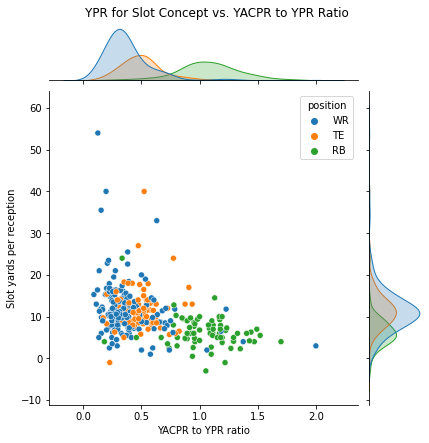

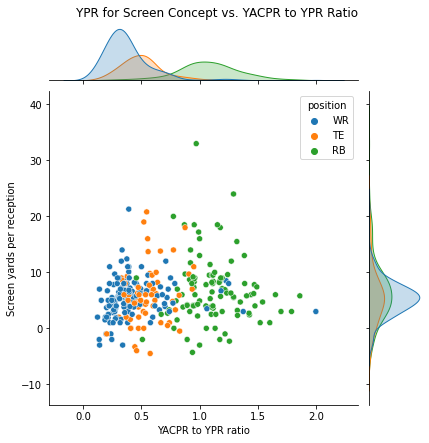

In [24]:
g1 = sb.jointplot(data=receiving_concept,
            x='yacpr_to_ypr_ratio', y='slot_yards_per_reception', hue='position')
g1.set_axis_labels('YACPR to YPR ratio', 'Slot yards per reception')
g1.fig.suptitle('YPR for Slot Concept vs. YACPR to YPR Ratio', y=1.02)

g2 = sb.jointplot(data=receiving_concept,
            x='yacpr_to_ypr_ratio', y='screen_yards_per_reception', hue='position')
g2.set_axis_labels('YACPR to YPR ratio', 'Screen yards per reception')
g2.fig.suptitle('YPR for Screen Concept vs. YACPR to YPR Ratio', y=1.02);

YPA by offensive concept shows more of a correlation to the overall YAC-to-total ratio in slot passes and a clearer breakdown by position than in screen passes. What does this mean for slot concept plays? Wide receivers and tight ends have similar YPA from the slot, so we can infer that tight ends can take advantage of lining up at the slot to catch more shallow passes and accrue more YAC, while wide receivers tend to go deeper from the slot to make a catch. Running backs, on the other hand, have lower YPA from the slot, so even though they have the ability to get a higher portion of their yardage from YAC than other positions, that formation is likely not the most efficient for running backs being used as a receiving back in a hybrid role.  

Finally, how does this ratio compare to ADOT by offensive concept?

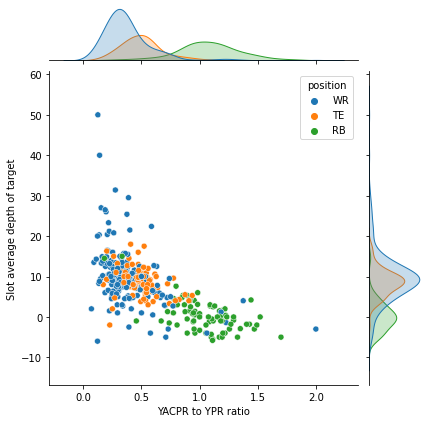

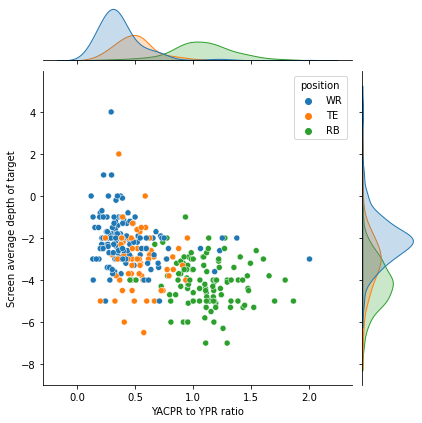

In [25]:
g1 = sb.jointplot(data=receiving_concept,
            x='yacpr_to_ypr_ratio', y='slot_avg_depth_of_target', hue='position')
g1.set_axis_labels('YACPR to YPR ratio', 'Slot average depth of target')

g2 = sb.jointplot(data=receiving_concept,
            x='yacpr_to_ypr_ratio', y='screen_avg_depth_of_target', hue='position')
g2.set_axis_labels('YACPR to YPR ratio', 'Screen average depth of target');

**Note:** Depth of target, just like YPR, is measured from the line of scrimmage, not from where the quarterback throws. This means that positive ADOT is a target past the line of scrimmage, while negative ADOT is behind the line.

For receptions from the slot, wide receivers and tight ends have similar mean ADOT values, but receivers are also more likely to be targeted deeper, which is consistent with them having a lower YAC to total ratio than tight ends. Running backs get targeted more shallow and at times even behind the line of scrimmage when catching from the slot, so they get more of their forward yards after the catch. This pattern also is broadly the same for screen plays, except in that case tight ends get targeted on average further behind the line of scrimmage than a wide receiver.  

We can learn from these correlations that quick and shallow passes to running backs can be a good way to get a few yards on a play if that's all that's needed, not just on a screen pass but even from the slot. Wide receivers and tight ends, on the other hand, tend to do better getting targeted deeper and still getting good yardage, particularly when lining up at the slot as opposed to on a screen play where they don't have an inherent advantage over a running back.  

## 3. Impact of Defensive Scheme
Next we take a look at how defensive scheme, which in the PFF data is delineated between man and zone coverage for the sake of simplicity, impacts different positions and their ability to make downfield plays. Man coverage entails one defender shadowing each receiver to narrow their catching window significantly, while zone has defenders covering a zone in the backfield that helps them close receiving lanes without shadowing receivers one-on-one.

In [26]:
receiving_scheme = pd.merge(receiving_summary[['player', 'player_id', 'position', 'team_name', 'yacpr_to_ypr_ratio']],
                             receiving_scheme.drop(columns=['player', 'position', 'team_name']), on='player_id')
receiving_scheme

,player,player_id,position,team_name,yacpr_to_ypr_ratio,player_game_count,base_targets,declined_penalties,franchise_id,man_avg_depth_of_target,man_avoided_tackles,man_caught_percent,man_contested_catch_rate,man_contested_receptions,man_contested_targets,man_drop_rate,man_drops,man_first_downs,man_fumbles,man_grades_hands_drop,man_grades_pass_route,man_interceptions,man_longest,man_pass_block_rate,man_pass_blocks,man_pass_plays,man_receptions,man_route_rate,man_routes,man_targeted_qb_rating,man_targets,man_targets_percent,man_touchdowns,man_yards,man_yards_after_catch,man_yards_after_catch_per_reception,man_yards_per_reception,man_yprr,penalties,zone_avg_depth_of_target,zone_avoided_tackles,zone_caught_percent,zone_contested_catch_rate,zone_contested_receptions,zone_contested_targets,zone_drop_rate,zone_drops,zone_first_downs,zone_fumbles,zone_grades_hands_drop,zone_grades_pass_route,zone_interceptions,zone_longest,zone_pass_block_rate,zone_pass_blocks,zone_pass_plays,zone_receptions,zone_route_rate,zone_routes,zone_targeted_qb_rating,zone_targets,zone_targets_percent,zone_touchdowns,zone_yards,zone_yards_after_catch,zone_yards_after_catch_per_reception,zone_yards_per_reception,zone_yprr
0,Justin Jefferson,61398,WR,MIN,0.340580,18,185,0,18,12.5,3,61.8,53.3,8,15,2.9,1,23,0,71.4,86.9,1,47,0.0,0,230,34,91.3,210,106.8,55,29.7,2,642,238,7.0,18.9,3.06,0,10.3,6,79.8,55.0,11,20,4.6,4,52,0,85.0,90.2,4,64,0.0,0,412,83,95.4,393,103.0,104,56.2,3,1067,357,4.3,12.9,2.72
1,Travis Kelce,7844,TE,KC,0.482759,20,182,0,16,7.6,13,75.0,53.8,7,13,4.0,2,34,0,79.3,91.0,1,39,3.2,9,277,48,87.4,242,131.0,64,35.2,10,512,280,5.8,10.7,2.12,0,7.5,9,76.8,37.5,3,8,2.7,2,48,2,87.8,90.7,2,52,4.1,16,390,73,92.6,361,103.2,95,52.2,1,966,442,6.1,13.2,2.68
2,Tyreek Hill,10799,WR,MIA,0.297872,18,181,0,17,12.1,3,64.5,37.5,3,8,0.0,0,13,1,83.6,86.2,2,26,0.0,0,100,20,94.0,94,81.7,31,17.1,2,232,61,3.1,11.6,2.47,0,12.7,5,72.0,57.1,8,14,5.3,5,57,0,78.5,91.5,5,64,0.0,0,383,90,95.0,364,102.2,125,69.1,5,1302,367,4.1,14.5,3.58
3,Davante Adams,8688,WR,LV,0.328947,17,168,0,23,12.0,5,51.5,37.5,3,8,5.6,1,14,0,68.7,82.8,0,58,0.0,0,134,17,92.5,124,115.9,33,19.6,4,248,101,5.9,14.6,2.00,0,12.7,7,61.7,45.0,9,20,7.0,5,39,1,67.8,89.4,6,60,0.3,1,362,66,95.9,347,82.5,107,63.7,5,946,328,5.0,14.3,2.73
4,CeeDee Lamb,61570,WR,DAL,0.359375,19,167,0,9,11.0,3,71.1,58.3,7,12,3.0,1,23,0,79.9,90.7,1,34,0.0,0,171,32,92.4,158,116.7,45,26.9,3,458,140,4.4,14.3,2.90,0,10.0,9,73.5,42.9,6,14,7.4,6,43,0,65.2,79.2,2,46,0.0,0,404,75,95.8,387,109.7,102,61.1,5,934,366,4.9,12.5,2.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,Tommy Sweeney,47216,TE,BUF,1.142857,4,1,0,4,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,50.0,0,0,12.5,1,8,0,87.5,7,0.0,0,0.0,0,0,0,NaN,NaN,0.00,0,-1.0,0,100.0,NaN,0,0,0.0,0,1,0,64.7,67.1,0,7,21.4,3,14,1,78.6,11,95.8,1,100.0,0,7,8,8.0,7.0,0.64
440,Marcus Kemp,12137,WR,KC,0.153846,3,1,0,16,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,55.1,0,0,0.0,0,6,0,83.3,5,0.0,0,0.0,0,0,0,NaN,NaN,0.00,0,11.0,0,100.0,NaN,0,0,0.0,0,1,0,64.7,65.1,0,13,0.0,0,13,1,100.0,13,118.8,1,100.0,0,13,2,2.0,13.0,1.00
441,J.J. Taylor,25512,RB,NE,0.625000,1,1,0,19,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,60.0,0,0,0.0,0,1,0,100.0,1,0.0,0,0.0,0,0,0,NaN,NaN,0.00,0,3.0,1,100.0,NaN,0,0,0.0,0,0,0,64.7,71.9,0,8,0.0,0,6,1,100.0,6,100.0,1,100.0,0,8,5,5.0,8.0,1.33
442,Tyler Badie,83714,RB,DEN,1.291667,1,1,0,10,NaN,0,NaN,NaN,0,0,NaN,0,0,0,NaN,59.3,0,0,0.0,0,1,0,100.0,1,0.0,0,0.0,0,0,0,NaN,NaN,0.00,0,-7.0,0,100.0,NaN,0,0,0.0,0,1,0,64.7,79.5,0,24,0.0,0,2,1,100.0,2,158.3,1,100.0,1,24,31,31.0,24.0,12.00


Let's take a look at YACPR to YPR ratio based on scheme.

In [27]:
receiving_scheme['man_yacpr_to_ypr_ratio'] = receiving_scheme['man_yards_after_catch_per_reception'] / receiving_scheme['man_yards_per_reception']
receiving_scheme['zone_yacpr_to_ypr_ratio'] = receiving_scheme['zone_yards_after_catch_per_reception'] / receiving_scheme['zone_yards_per_reception']

In [28]:
receiving_scheme.describe()

,player_id,yacpr_to_ypr_ratio,player_game_count,base_targets,declined_penalties,franchise_id,man_avg_depth_of_target,man_avoided_tackles,man_caught_percent,man_contested_catch_rate,man_contested_receptions,man_contested_targets,man_drop_rate,man_drops,man_first_downs,man_fumbles,man_grades_hands_drop,man_grades_pass_route,man_interceptions,man_longest,man_pass_block_rate,man_pass_blocks,man_pass_plays,man_receptions,man_route_rate,man_routes,man_targeted_qb_rating,man_targets,man_targets_percent,man_touchdowns,man_yards,man_yards_after_catch,man_yards_after_catch_per_reception,man_yards_per_reception,man_yprr,penalties,zone_avg_depth_of_target,zone_avoided_tackles,zone_caught_percent,zone_contested_catch_rate,zone_contested_receptions,zone_contested_targets,zone_drop_rate,zone_drops,zone_first_downs,zone_fumbles,zone_grades_hands_drop,zone_grades_pass_route,zone_interceptions,zone_longest,zone_pass_block_rate,zone_pass_blocks,zone_pass_plays,zone_receptions,zone_route_rate,zone_routes,zone_targeted_qb_rating,zone_targets,zone_targets_percent,zone_touchdowns,zone_yards,zone_yards_after_catch,zone_yards_after_catch_per_reception,zone_yards_per_reception,zone_yprr,man_yacpr_to_ypr_ratio,zone_yacpr_to_ypr_ratio
count,444.000000,444.000000,444.000000,444.000000,444.0,444.000000,379.000000,444.000000,379.000000,244.000000,444.000000,444.000000,355.000000,444.000000,444.000000,444.000000,356.000000,434.000000,444.000000,444.000000,435.000000,444.000000,444.000000,444.000000,435.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,345.000000,345.000000,434.000000,444.0,436.000000,444.000000,436.000000,289.000000,444.000000,444.000000,432.000000,444.00000,444.000000,444.000000,432.000000,443.000000,444.000000,444.000000,443.000000,444.000000,444.000000,444.00000,443.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,432.000000,432.000000,443.000000,344.000000,432.000000
mean,43166.051802,0.608812,12.362613,38.774775,0.0,16.421171,8.066755,0.662162,62.035092,45.148770,1.074324,2.349099,9.214930,0.434685,4.006757,0.054054,62.434551,61.757834,0.204955,18.720721,10.888046,4.990991,64.333333,5.954955,81.892184,54.459459,75.733333,9.657658,21.908108,0.702703,73.344595,31.504505,5.733913,11.482029,1.111221,0.0,6.858945,2.380631,74.233945,43.744291,1.337838,2.898649,5.324537,1.02027,8.270270,0.184685,66.966435,63.310384,0.608108,27.403153,7.845147,8.840090,146.078829,17.27027,88.812415,131.957207,87.271171,23.495495,63.253153,0.457207,185.022523,91.349099,5.721528,10.722685,1.347743,inf,0.621141
std,28588.181146,0.379047,5.190854,39.424113,0.0,9.320024,6.948416,1.421636,28.644594,35.114568,1.844121,3.654642,19.488627,0.776497,5.615397,0.236140,16.058645,12.251547,0.499094,17.576878,14.950644,7.781143,56.129620,7.620677,14.750396,50.545071,44.022322,12.018793,15.640543,1.217588,106.903178,44.005207,5.959674,7.694174,1.551351,0.0,6.392380,3.370525,17.589164,34.799679,2.198565,4.071161,7.622655,1.33778,9.521932,0.457828,13.886817,10.601892,1.057928,17.095195,10.305742,13.478655,116.765013,17.19281,10.235306,110.435892,27.129573,23.250282,18.373255,0.868546,203.890688,95.861461,3.385732,4.953266,0.960057,NaN,0.396165
min,2973.000000,0.069565,1.000000,1.000000,0.0,1.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.400000,28.800000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,-3.000000,-0.670000,0.0,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,27.100000,32.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,-2.000000,0.000000
25%,11915.250000,0.321477,9.000000,9.000000,0.0,9.000000,3.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.500000,53.225000,0.00

In [29]:
receiving_scheme.replace(np.inf, np.nan, inplace=True)
receiving_scheme.describe()

,player_id,yacpr_to_ypr_ratio,player_game_count,base_targets,declined_penalties,franchise_id,man_avg_depth_of_target,man_avoided_tackles,man_caught_percent,man_contested_catch_rate,man_contested_receptions,man_contested_targets,man_drop_rate,man_drops,man_first_downs,man_fumbles,man_grades_hands_drop,man_grades_pass_route,man_interceptions,man_longest,man_pass_block_rate,man_pass_blocks,man_pass_plays,man_receptions,man_route_rate,man_routes,man_targeted_qb_rating,man_targets,man_targets_percent,man_touchdowns,man_yards,man_yards_after_catch,man_yards_after_catch_per_reception,man_yards_per_reception,man_yprr,penalties,zone_avg_depth_of_target,zone_avoided_tackles,zone_caught_percent,zone_contested_catch_rate,zone_contested_receptions,zone_contested_targets,zone_drop_rate,zone_drops,zone_first_downs,zone_fumbles,zone_grades_hands_drop,zone_grades_pass_route,zone_interceptions,zone_longest,zone_pass_block_rate,zone_pass_blocks,zone_pass_plays,zone_receptions,zone_route_rate,zone_routes,zone_targeted_qb_rating,zone_targets,zone_targets_percent,zone_touchdowns,zone_yards,zone_yards_after_catch,zone_yards_after_catch_per_reception,zone_yards_per_reception,zone_yprr,man_yacpr_to_ypr_ratio,zone_yacpr_to_ypr_ratio
count,444.000000,444.000000,444.000000,444.000000,444.0,444.000000,379.000000,444.000000,379.000000,244.000000,444.000000,444.000000,355.000000,444.000000,444.000000,444.000000,356.000000,434.000000,444.000000,444.000000,435.000000,444.000000,444.000000,444.000000,435.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,345.000000,345.000000,434.000000,444.0,436.000000,444.000000,436.000000,289.000000,444.000000,444.000000,432.000000,444.00000,444.000000,444.000000,432.000000,443.000000,444.000000,444.000000,443.000000,444.000000,444.000000,444.00000,443.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,432.000000,432.000000,443.000000,343.000000,432.000000
mean,43166.051802,0.608812,12.362613,38.774775,0.0,16.421171,8.066755,0.662162,62.035092,45.148770,1.074324,2.349099,9.214930,0.434685,4.006757,0.054054,62.434551,61.757834,0.204955,18.720721,10.888046,4.990991,64.333333,5.954955,81.892184,54.459459,75.733333,9.657658,21.908108,0.702703,73.344595,31.504505,5.733913,11.482029,1.111221,0.0,6.858945,2.380631,74.233945,43.744291,1.337838,2.898649,5.324537,1.02027,8.270270,0.184685,66.966435,63.310384,0.608108,27.403153,7.845147,8.840090,146.078829,17.27027,88.812415,131.957207,87.271171,23.495495,63.253153,0.457207,185.022523,91.349099,5.721528,10.722685,1.347743,0.559389,0.621141
std,28588.181146,0.379047,5.190854,39.424113,0.0,9.320024,6.948416,1.421636,28.644594,35.114568,1.844121,3.654642,19.488627,0.776497,5.615397,0.236140,16.058645,12.251547,0.499094,17.576878,14.950644,7.781143,56.129620,7.620677,14.750396,50.545071,44.022322,12.018793,15.640543,1.217588,106.903178,44.005207,5.959674,7.694174,1.551351,0.0,6.392380,3.370525,17.589164,34.799679,2.198565,4.071161,7.622655,1.33778,9.521932,0.457828,13.886817,10.601892,1.057928,17.095195,10.305742,13.478655,116.765013,17.19281,10.235306,110.435892,27.129573,23.250282,18.373255,0.868546,203.890688,95.861461,3.385732,4.953266,0.960057,0.590313,0.396165
min,2973.000000,0.069565,1.000000,1.000000,0.0,1.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.400000,28.800000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,-3.000000,-0.670000,0.0,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,27.100000,32.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,-2.000000,0.000000
25%,11915.250000,0.321477,9.000000,9.000000,0.0,9.000000,3.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.500000,53.2

In [30]:
yacpr_ypr_scheme_ratios = receiving_scheme[['player', 'position',
                                            'yacpr_to_ypr_ratio',
                                            'man_yacpr_to_ypr_ratio',
                                            'zone_yacpr_to_ypr_ratio']].melt(id_vars=['player', 'position'],
                                                                             value_vars=['yacpr_to_ypr_ratio',
                                                                                         'man_yacpr_to_ypr_ratio',
                                                                                         'zone_yacpr_to_ypr_ratio'])
yacpr_ypr_scheme_ratios.rename(columns={'variable': 'scheme', 'value': 'yacpr_to_ypr_ratio'}, inplace=True)
yacpr_ypr_scheme_ratios.replace({'yacpr_to_ypr_ratio': 'all',
                                 'man_yacpr_to_ypr_ratio': 'man',
                                 'zone_yacpr_to_ypr_ratio': 'zone'}, inplace=True)
yacpr_ypr_scheme_ratios

,player,position,scheme,yacpr_to_ypr_ratio
0,Justin Jefferson,WR,all,0.340580
1,Travis Kelce,TE,all,0.482759
2,Tyreek Hill,WR,all,0.297872
3,Davante Adams,WR,all,0.328947
4,CeeDee Lamb,WR,all,0.359375
...,...,...,...,...
1327,Tommy Sweeney,TE,zone,1.142857
1328,Marcus Kemp,WR,zone,0.153846
1329,J.J. Taylor,RB,zone,0.625000
1330,Tyler Badie,RB,zone,1.291667


In [31]:
round?

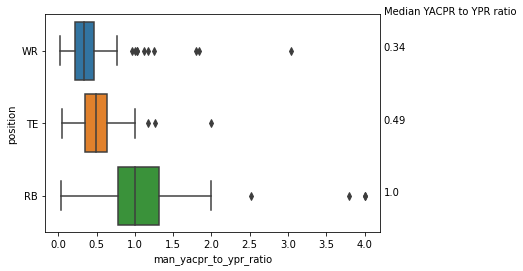

In [32]:
g = sb.boxplot(data=receiving_scheme[receiving_scheme['man_yacpr_to_ypr_ratio'] > 0],
               y='position', x='man_yacpr_to_ypr_ratio')
g.text(4.25, -0.5, 'Median YACPR to YPR ratio')
for ytick in g.get_yticks():
    pos = g.get_yticklabels()[ytick].get_text()
    g.text(4.25, ytick,
           round(receiving_scheme[(receiving_scheme['position'] == pos)
                            & (receiving_scheme['man_yacpr_to_ypr_ratio'] > 0)]['man_yacpr_to_ypr_ratio'].median(), 2))

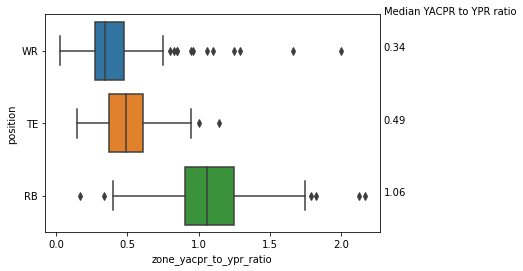

In [33]:
g = sb.boxplot(data=receiving_scheme[receiving_scheme['zone_yacpr_to_ypr_ratio'] > 0],
           y='position', x='zone_yacpr_to_ypr_ratio')
g.text(2.3, -0.5, 'Median YACPR to YPR ratio')
for ytick in g.get_yticks():
    pos = g.get_yticklabels()[ytick].get_text()
    g.text(2.3, ytick,
           round(receiving_scheme[(receiving_scheme['position'] == pos)
                            & (receiving_scheme['zone_yacpr_to_ypr_ratio'] > 0)]['zone_yacpr_to_ypr_ratio'].median(), 2))

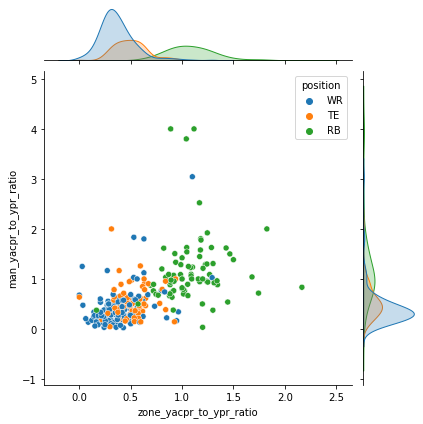

In [34]:
sb.jointplot(data=receiving_scheme[receiving_scheme['man_yacpr_to_ypr_ratio'] > 0],
             x='zone_yacpr_to_ypr_ratio', y='man_yacpr_to_ypr_ratio', hue='position')

<AxesSubplot:xlabel='man_yacpr_to_ypr_ratio', ylabel='Count'>

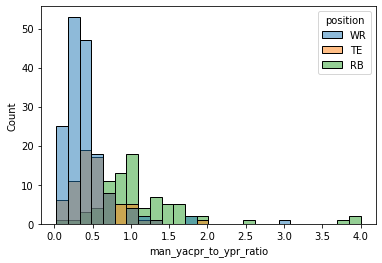

In [35]:
sb.histplot(data=receiving_scheme[receiving_scheme['man_yacpr_to_ypr_ratio'] > 0],
            x='man_yacpr_to_ypr_ratio', hue='position')

<AxesSubplot:xlabel='zone_yacpr_to_ypr_ratio', ylabel='Count'>

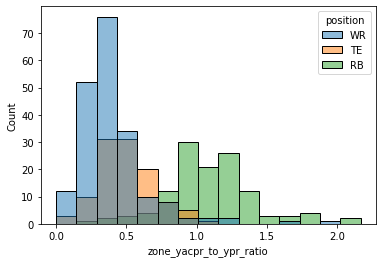

In [36]:
sb.histplot(data=receiving_scheme,
            x='zone_yacpr_to_ypr_ratio', hue='position')

<AxesSubplot:xlabel='yacpr_to_ypr_ratio', ylabel='Count'>

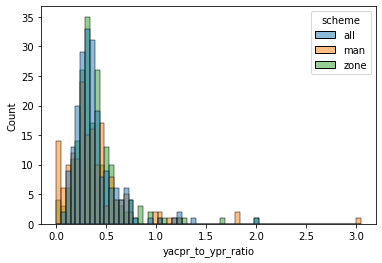

In [37]:
sb.histplot(data=yacpr_ypr_scheme_ratios[yacpr_ypr_scheme_ratios['position'] == 'WR'],
            x='yacpr_to_ypr_ratio', hue='scheme')

<AxesSubplot:xlabel='yacpr_to_ypr_ratio', ylabel='Count'>

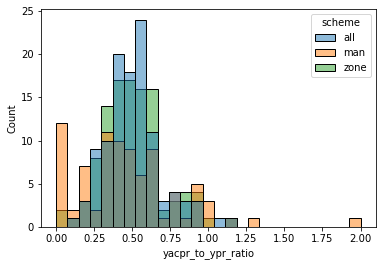

In [38]:
sb.histplot(data=yacpr_ypr_scheme_ratios[yacpr_ypr_scheme_ratios['position'] == 'TE'],
            x='yacpr_to_ypr_ratio', hue='scheme')

<AxesSubplot:xlabel='yacpr_to_ypr_ratio', ylabel='Count'>

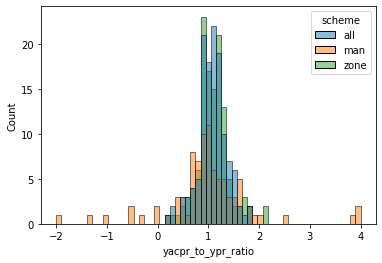

In [39]:
sb.histplot(data=yacpr_ypr_scheme_ratios[yacpr_ypr_scheme_ratios['position'] == 'RB'],
            x='yacpr_to_ypr_ratio', hue='scheme')

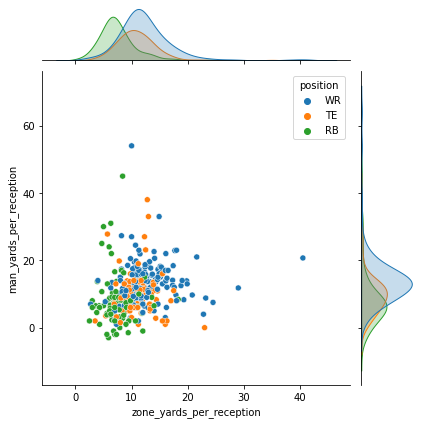

In [40]:
sb.jointplot(data=receiving_scheme,
             x='zone_yards_per_reception', y='man_yards_per_reception', hue='position')

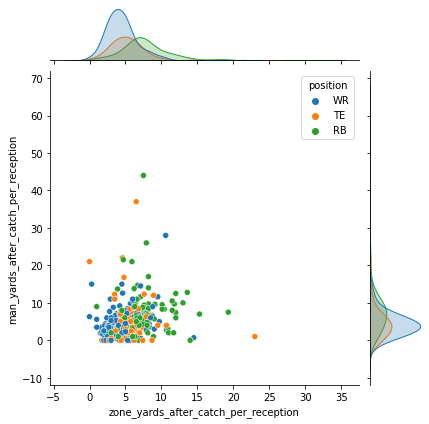

In [41]:
sb.jointplot(data=receiving_scheme,
             x='zone_yards_after_catch_per_reception', y='man_yards_after_catch_per_reception', hue='position')

Based on this analysis, there doesn't appear to be a clear correlation in YPR, YACPR or the ratio of those quantities by defensive scheme. However, one question worth looking into is if the coverage type affects the ability of certain positions to more efficiently get targeted in contested plays by running routes to get enough separation for a catch. What does the correlation between contested targets and routes run for each position look like?

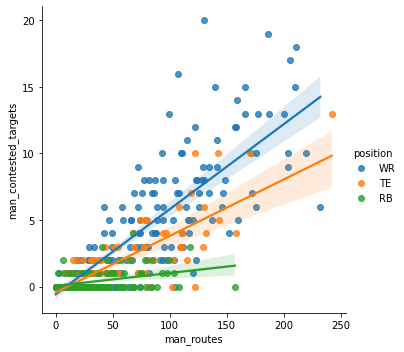

In [42]:
sb.lmplot(data=receiving_scheme, x='man_routes', y='man_contested_targets', hue='position')

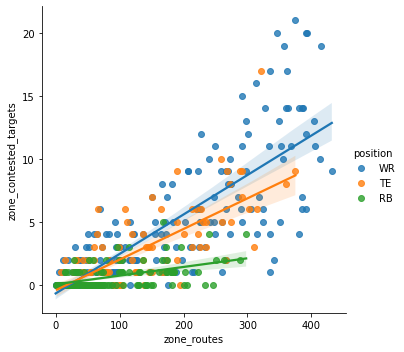

In [43]:
sb.lmplot(data=receiving_scheme, x='zone_routes', y='zone_contested_targets', hue='position')

When looking at man coverage, the slopes of the lines for WRs and TEs plotting contested targets against routes are further apart than for zone coverage. What could this mean? Could wide receivers be targeted at a higher rate in man coverage than in zone per route run? To look into this, we develop a new feature for contested target to route ratio by coverage scheme./

In [44]:
receiving_scheme['zone_contested_target_route_ratio'] = receiving_scheme['zone_contested_targets'] / receiving_scheme['zone_routes']
receiving_scheme['man_contested_target_route_ratio'] = receiving_scheme['man_contested_targets'] / receiving_scheme['man_routes']

In [45]:
contested_target_route_ratios = receiving_scheme[['player', 'position',
                                                  'man_contested_target_route_ratio',
                                                  'zone_contested_target_route_ratio']].melt(id_vars=['player', 'position'],
                                                                                             value_vars=['man_contested_target_route_ratio',
                                                                                                        'zone_contested_target_route_ratio'],
                                                                                             var_name='scheme',
                                                                                             value_name='contested_target_route_ratio')
contested_target_route_ratios.replace({'man_contested_target_route_ratio': 'man',
                                       'zone_contested_target_route_ratio': 'zone'}, inplace=True)
contested_target_route_ratios

,player,position,scheme,contested_target_route_ratio
0,Justin Jefferson,WR,man,0.071429
1,Travis Kelce,TE,man,0.053719
2,Tyreek Hill,WR,man,0.085106
3,Davante Adams,WR,man,0.064516
4,CeeDee Lamb,WR,man,0.075949
...,...,...,...,...
883,Tommy Sweeney,TE,zone,0.000000
884,Marcus Kemp,WR,zone,0.000000
885,J.J. Taylor,RB,zone,0.000000
886,Tyler Badie,RB,zone,0.000000


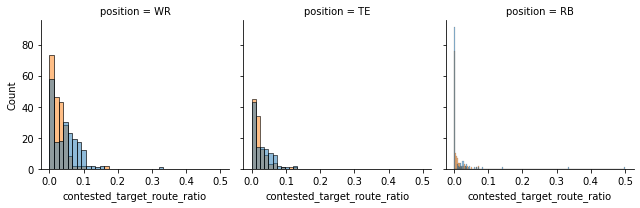

In [46]:
g = sb.FacetGrid(data=contested_target_route_ratios, col='position')
g.map_dataframe(sb.histplot, x='contested_target_route_ratio', hue='scheme')

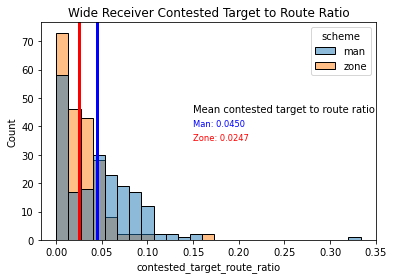

In [61]:
g = sb.histplot(data=contested_target_route_ratios[contested_target_route_ratios['position'] == 'WR'],
            x='contested_target_route_ratio', hue='scheme')
g.axvline(x=contested_target_route_ratios[(contested_target_route_ratios['position'] == 'WR')
                                                                 & (contested_target_route_ratios['scheme'] == 'man')]['contested_target_route_ratio'].mean(), color='blue', lw=3)
g.axvline(x=contested_target_route_ratios[(contested_target_route_ratios['position'] == 'WR')
                                                                 & (contested_target_route_ratios['scheme'] == 'zone')]['contested_target_route_ratio'].mean(), color='red', lw=3)
g.text(0.15, 45, 'Mean contested target to route ratio')
g.text(0.15, 40, 'Man: {:.4f}'.format(contested_target_route_ratios[(contested_target_route_ratios['position'] == 'WR')
                                                                 & (contested_target_route_ratios['scheme'] == 'man')]['contested_target_route_ratio'].mean()),
       size='small',color='blue');
g.text(0.15, 35, 'Zone: {:.4f}'.format(contested_target_route_ratios[(contested_target_route_ratios['position'] == 'WR')
                                                                 & (contested_target_route_ratios['scheme'] == 'zone')]['contested_target_route_ratio'].mean()),
       size='small',color='red')
g.set_title('Wide Receiver Contested Target to Route Ratio');

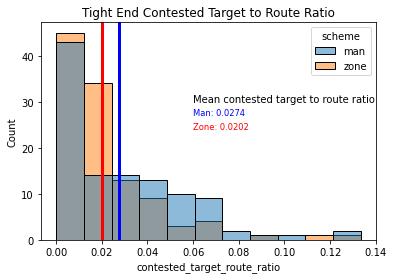

In [62]:
g = sb.histplot(data=contested_target_route_ratios[contested_target_route_ratios['position'] == 'TE'],
            x='contested_target_route_ratio', hue='scheme')
g.axvline(x=contested_target_route_ratios[(contested_target_route_ratios['position'] == 'TE')
                                                                 & (contested_target_route_ratios['scheme'] == 'man')]['contested_target_route_ratio'].mean(), color='blue', lw=3)
g.axvline(x=contested_target_route_ratios[(contested_target_route_ratios['position'] == 'TE')
                                                                 & (contested_target_route_ratios['scheme'] == 'zone')]['contested_target_route_ratio'].mean(), color='red', lw=3)
g.text(0.06, 30, 'Mean contested target to route ratio')
g.text(0.06, 27, 'Man: {:.4f}'.format(contested_target_route_ratios[(contested_target_route_ratios['position'] == 'TE')
                                                                 & (contested_target_route_ratios['scheme'] == 'man')]['contested_target_route_ratio'].mean()),
       size='small', color='blue');
g.text(0.06, 24, 'Zone: {:.4f}'.format(contested_target_route_ratios[(contested_target_route_ratios['position'] == 'TE')
                                                                 & (contested_target_route_ratios['scheme'] == 'zone')]['contested_target_route_ratio'].mean()),
       size='small',color='red')
g.set_title('Tight End Contested Target to Route Ratio');

It's clear that WRs have a more stark difference in ratio of contested targets to routes run between man and zone coverage than TEs do. This shows that WRs tend to have more of an advantage in getting targeted when being covered by one defensive player consistently, which can be attributed to their speed and physical versatility aided by being smaller than TEs.

## 4. Scoring
Finally, I want to take a look about how different positions compare in scoring for the ten teams with the most passing touchdowns last season. How much do they contribute to the main purpose of the game relative to each other for the best teams?

In [49]:
touchdowns = receiving_summary[['position', 'team_name', 'touchdowns']].groupby(['team_name', 'position'], as_index=False).sum()
total_touchdowns = receiving_summary[['team_name', 'touchdowns']].groupby(['team_name'], as_index=False).sum()
touchdowns = pd.merge(touchdowns, total_touchdowns, on='team_name')
touchdowns.rename(columns={'touchdowns_x': 'touchdowns', 'touchdowns_y': 'total_passing_touchdowns'}, inplace=True)

touchdowns.sort_values(by='total_passing_touchdowns', ascending=False, inplace=True)
total_touchdowns.sort_values(by='touchdowns', ascending=False, inplace=True)
touchdowns

,team_name,position,touchdowns,total_passing_touchdowns
46,KC,TE,20,49
45,KC,RB,12,49
47,KC,WR,17,49
18,CIN,RB,7,39
20,CIN,WR,28,39
...,...,...,...,...
13,CAR,TE,3,14
12,CAR,RB,0,14
80,PIT,WR,4,10
79,PIT,TE,3,10


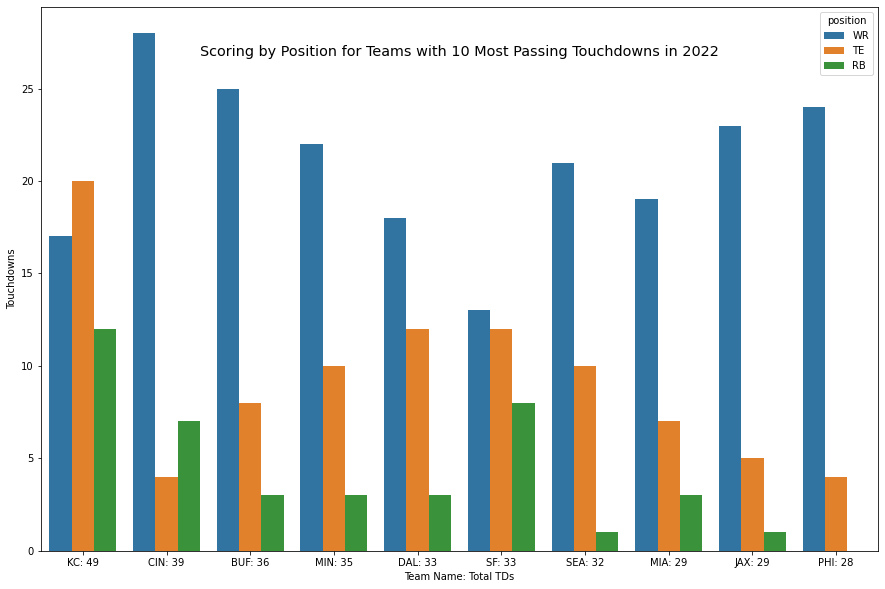

In [50]:
plt.figure(figsize=(15, 10))
g = sb.barplot(data=touchdowns[touchdowns['team_name'].isin(total_touchdowns.head(10)['team_name'])],
                           x='team_name', y='touchdowns', hue='position', hue_order=['WR', 'TE', 'RB'])
new_labels = ['{0}: {1}'.format(tick_label.get_text(),
                                    touchdowns[touchdowns['team_name'] == tick_label.get_text()]['total_passing_touchdowns'].values[0])
              for tick_label in g.get_xticklabels()]
g.set_xticks(ticks=g.get_xticks(), labels=new_labels)
g.set_title('Scoring by Position for Teams with 10 Most Passing Touchdowns in 2022', y=0.9, fontsize='x-large')
g.set_xlabel('Team Name: Total TDs')
g.set_ylabel('Touchdowns');

With the exception of Kansas City, all the other teams in the top 10 largely saw their pass-based scoring dominated by WRs. However, TEs still contributed significantly and in fact showed a pattern of making more of a difference for the middle teams and less so for the teams on either extreme (aside from Kansas City). It's also noteworthy how much RBs contributed to passing plays that got into the endzone, which shows that even they can be used on short yardage situations by making plays like screen passes that allow them to quickly get in from the outside.